## Desafío 3. Modelo de clasificación

#### 1. Importamos las librerías 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import linear_model
from sklearn import model_selection
import re
from scipy import random
%matplotlib inline

In [2]:
# !pip install pandas-profiling
# !conda install -c conda-forge imbalanced-learn

#### 2. Importamos el dataset

El dataset fue descargado de la web [Kaggle](https://www.kaggle.com/datasets). Presenta los detalles de clientes bancarios y la variable target (binaria) corresponde al estado del cliente: 1 si ha cerrado su cuenta y 0 si se mantiene en el banco.  

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 3. Analizamos las features

In [4]:
df.sort_values(by = ['CreditScore'],ascending = False)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
792,793,15707473,Summers,850,Germany,Female,48,6,111962.99,1,1,0,111755.80,0
4083,4084,15672640,Kambinachi,850,Spain,Female,45,4,114347.85,2,1,1,109089.04,0
4158,4159,15771580,Davison,850,France,Female,38,0,106831.69,1,0,1,148977.72,0
4157,4158,15719793,Watson,850,Spain,Male,62,5,0.00,2,1,1,180243.56,0
7413,7414,15604536,Vachon,850,Germany,Female,31,4,164672.66,1,0,1,61936.10,0
4141,4142,15790596,Moran,850,Spain,Male,39,0,141829.67,1,1,1,92748.16,0
7470,7471,15602456,Afanasyev,850,Germany,Female,47,4,99219.47,2,1,1,122141.13,0
4104,4105,15676571,Bezrukova,850,France,Male,55,6,0.00,1,1,0,944.41,1
4071,4072,15732430,H?,850,Spain,Female,54,4,120952.74,1,1,0,66963.15,0
7371,7372,15624850,Grant,850,France,Male,30,10,153972.89,2,1,0,62811.03,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
import pandas_profiling
df.profile_report()

In [8]:
# analizamos la ditribución de la variable target
df['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [9]:
# eliminamos duplicados
df.drop_duplicates(inplace = True)
len(df)

10000

In [10]:
# eliminamos NaNs
df.dropna(inplace = True)
len(df)

10000

#### 4. Modelo de clasificación simple (sin ajustes)

#### 4.1 Naive Bayes

* Comenzamos con **Naive Bayes** para obtener un modelo simple que sirva de *baseline* a nuestro trabajo

#### a) Generamos las variables de features y target

In [131]:
X = df.iloc[:,1:-1]

# eliminamos las columnas que no sirven
X.drop(columns = ['CustomerId','Surname'], inplace = True)
y = df['Exited']

In [12]:
X.columns
X=pd.get_dummies(X , prefix='', drop_first= True)

#### b) Realizamos el split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=16)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### c) Ajuste y predicción

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.812

In [16]:
roc_auc_score(y_test,y_pred)

0.6231439451778436

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1593
           1       0.57      0.30      0.40       407

    accuracy                           0.81      2000
   macro avg       0.71      0.62      0.64      2000
weighted avg       0.79      0.81      0.79      2000



In [18]:
print(confusion_matrix(y_test,y_pred))

[[1500   93]
 [ 283  124]]


Text(0.5, 1.0, 'Matriz de confusión - Naive Bayes sin ajustes')

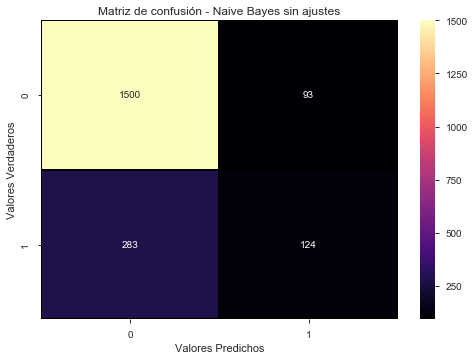

In [19]:
conf_nb1 = confusion_matrix(y_test,y_pred)
sns.heatmap(data=conf_nb1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Naive Bayes sin ajustes')

In [20]:
proba = model.predict_proba(X_test)

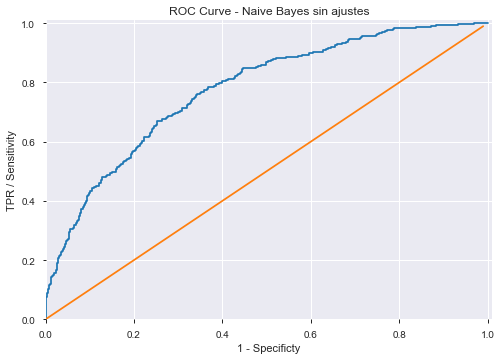

In [21]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Naive Bayes sin ajustes')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

#### 4.2.KNN

In [22]:
k =range(1,60)
scores={}
scores_list=[]

In [23]:
for a in k:
    neigh = KNeighborsClassifier(n_neighbors=a)
    neigh.fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Score')

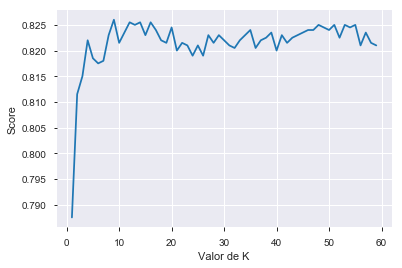

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k,scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Score")

In [25]:
results = pd.concat([pd.Series(k), pd.Series(scores_list)], axis = 1)
results.columns = ['k', 'scores_list']
best_k = results.loc[results['scores_list'] == results['scores_list'].max() , 'k']
print('El valor máximo de accuracy hallado es:',np.max(scores_list))
print('El número de vecinos óptimo para este modelo es:',[i for i in best_k][0])

El valor máximo de accuracy hallado es: 0.826
El número de vecinos óptimo para este modelo es: 9


In [26]:
neigh = KNeighborsClassifier(n_neighbors=14)
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.8255

In [28]:
roc_auc_score(y_test,y_pred)

0.6124113327503158

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.70      0.25      0.37       407

    accuracy                           0.83      2000
   macro avg       0.77      0.61      0.63      2000
weighted avg       0.81      0.83      0.79      2000



In [30]:
print(confusion_matrix(y_test,y_pred))

[[1548   45]
 [ 304  103]]


Text(0.5, 1.0, 'Matriz de confusión - KNN sin ajustes')

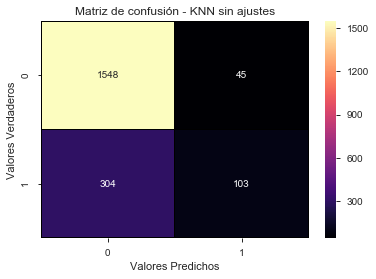

In [31]:
conf_knn1 = confusion_matrix(y_test,y_pred)
sns.heatmap(data=conf_knn1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - KNN sin ajustes')

In [32]:
proba = neigh.predict_proba(X_test)

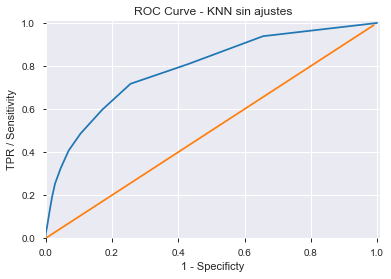

In [33]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - KNN sin ajustes')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 4.3 Regresion Logistica

In [34]:
rl = linear_model.LogisticRegression()
rl.fit(X_train,y_train)
predictions = rl.predict(X_test)

In [35]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=123)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.827625 (0.014355)


In [36]:
predictions = rl.predict(X_test)
print(accuracy_score(y_test, predictions))

0.804


In [37]:
roc_auc_score(y_test,predictions)

0.5824514807565655

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.55      0.21      0.30       407

    accuracy                           0.80      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.80      0.77      2000



In [39]:
print(confusion_matrix(y_test,predictions))

[[1523   70]
 [ 322   85]]


Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística sin ajustes')

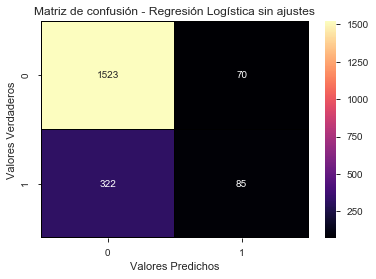

In [40]:
conf_log1 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Regresión Logística sin ajustes')

In [41]:
proba = rl.predict_proba(X_test)

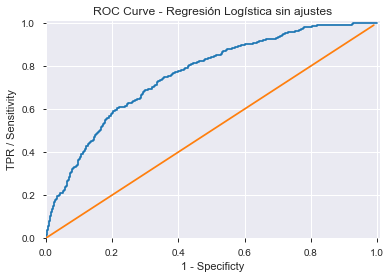

In [42]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Regresión Logística sin ajustes')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 5. Modelo de clasificación con class weights 

* Realizamos nuevamente la regresión logística balanceando las clases

In [43]:
rl = linear_model.LogisticRegression(C=1e10, class_weight = 'balanced')
rl.fit(X_train,y_train)
predictions = rl.predict(X_test)

In [44]:
# name='Logistic Regression'
# kfold = model_selection.KFold(n_splits=10, random_state=123)
# cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(msg)

In [45]:
predictions = rl.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7075


In [46]:
roc_auc_score(y_test,predictions)

0.6883362561328663

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1593
           1       0.38      0.66      0.48       407

    accuracy                           0.71      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.71      0.73      2000



In [48]:
print(confusion_matrix(y_test,predictions))

[[1148  445]
 [ 140  267]]


Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística con Class Weights')

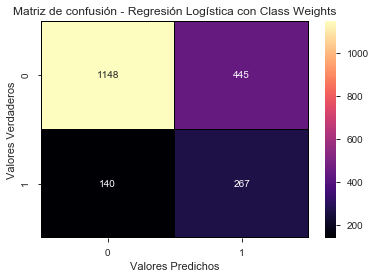

In [49]:
conf_log2 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Regresión Logística con Class Weights')

In [50]:
proba = rl.predict_proba(X_test)

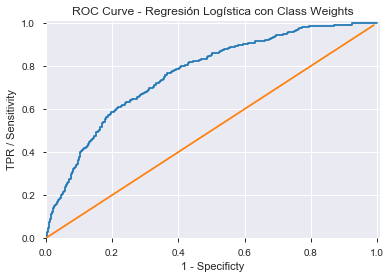

In [51]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Regresión Logística con Class Weights')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### Análisis conjunto de modelos

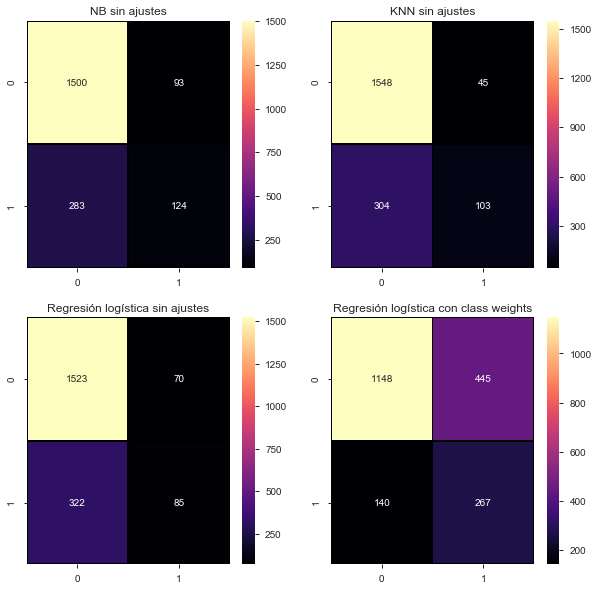

In [52]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax1.set_title('NB sin ajustes')

ax2 = fig.add_subplot(2, 2, 2) # row, column, position
ax2.set_title('KNN sin ajustes')

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Regresión logística sin ajustes')

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Regresión logística con class weights')

sns.heatmap(data=conf_nb1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma', ax = ax1)
sns.heatmap(data=conf_knn1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma', ax = ax2)
sns.heatmap(data=conf_log1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma', ax = ax3)
sns.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma', ax = ax4)
plt.show()

#### 6. Modelo de clasificación con Oversampling

In [53]:
from imblearn.over_sampling import SMOTE

# Instanciamos la clase SMOTE y realizamos el oversampling:

sm = SMOTE(random_state=12)

x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

x_train_res = scaler.fit_transform(x_train_res)

In [54]:
# Vemos la cantidad de observaciones en el set de entrenamiento resampleado para cada clase:

np.unique(y_train_res, return_counts=True)

(array([0, 1], dtype=int64), array([6370, 6370], dtype=int64))

#### 6.1 Naive Bayes 

In [55]:
model = GaussianNB()
model.fit(x_train_res,y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# Normalizamos los datos del set de testeo y hacemos las predicciones:

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.731

In [58]:
roc_auc_score(y_test,y_pred)

0.6939420159759143

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1593
           1       0.40      0.63      0.49       407

    accuracy                           0.73      2000
   macro avg       0.64      0.69      0.65      2000
weighted avg       0.79      0.73      0.75      2000



In [60]:
print(confusion_matrix(y_test,y_pred))

[[1205  388]
 [ 150  257]]


Text(0.5, 1.0, 'Matriz de confusión - Naive Bayes con Oversampling')

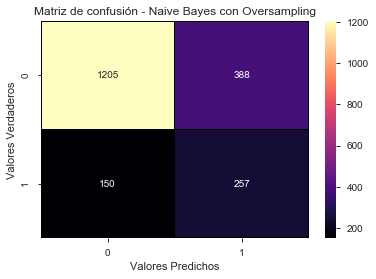

In [61]:
conf_nb2 = confusion_matrix(y_test,y_pred)
sns.heatmap(data=conf_nb2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Naive Bayes con Oversampling')

In [62]:
proba = model.predict_proba(X_test)

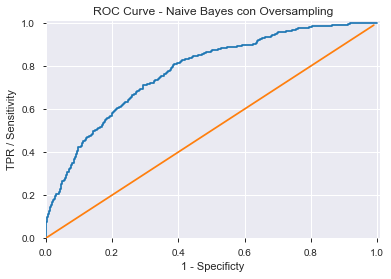

In [63]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Naive Bayes con Oversampling')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 6.2.KNN

In [64]:
k =range(1,60)
scores={}
scores_list=[]

In [65]:
for a in k:
    neigh = KNeighborsClassifier(n_neighbors=a)
    neigh.fit(x_train_res,y_train_res)
    y_pred=neigh.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Score')

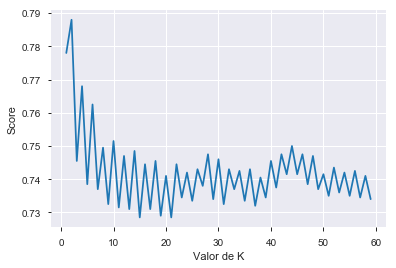

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k,scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Score")

In [67]:
results = pd.concat([pd.Series(k), pd.Series(scores_list)], axis = 1)
results.columns = ['k', 'scores_list']
best_k = results.loc[results['scores_list'] == results['scores_list'].max() , 'k']
print('El valor máximo de accuracy hallado es:',np.max(scores_list))
print('El número de vecinos óptimo para este modelo es:',[i for i in best_k][0])

El valor máximo de accuracy hallado es: 0.788
El número de vecinos óptimo para este modelo es: 2


In [68]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train_res,y_train_res)
y_pred=neigh.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

0.788

In [70]:
roc_auc_score(y_test,y_pred)

0.6519801774039062

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1593
           1       0.48      0.42      0.45       407

    accuracy                           0.79      2000
   macro avg       0.67      0.65      0.66      2000
weighted avg       0.78      0.79      0.78      2000



In [72]:
print(confusion_matrix(y_test,y_pred))

[[1404  189]
 [ 235  172]]


Text(0.5, 1.0, 'Matriz de confusión - KNN con Oversampling')

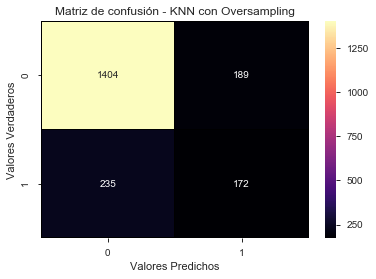

In [73]:
conf_knn2 = confusion_matrix(y_test,y_pred)
sns.heatmap(data=conf_knn2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - KNN con Oversampling')

In [74]:
proba = neigh.predict_proba(X_test)

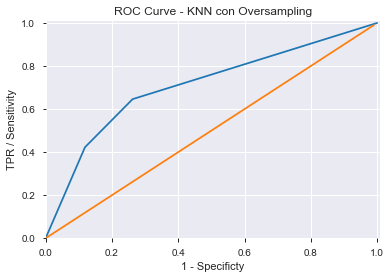

In [75]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - KNN con Oversampling')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 6.3 Regresion Logistica

In [76]:
rl = linear_model.LogisticRegression()
rl.fit(x_train_res,y_train_res)
predictions = rl.predict(X_test)

In [77]:
# name='Logistic Regression'
# kfold = model_selection.KFold(n_splits=10, random_state=123)
# cv_results = model_selection.cross_val_score(model, x_train_res,y_train_res, cv=kfold, scoring='accuracy')
# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(msg)

In [78]:
predictions = rl.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7115


In [79]:
roc_auc_score(y_test,predictions)

0.6908472416946994

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1593
           1       0.38      0.66      0.48       407

    accuracy                           0.71      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.79      0.71      0.74      2000



In [81]:
print(confusion_matrix(y_test,predictions))

[[1156  437]
 [ 140  267]]


Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística con Oversampling')

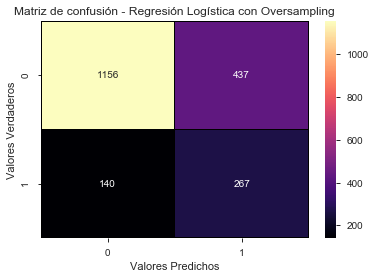

In [82]:
conf_log3 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log3, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Regresión Logística con Oversampling')

In [83]:
proba = rl.predict_proba(X_test)

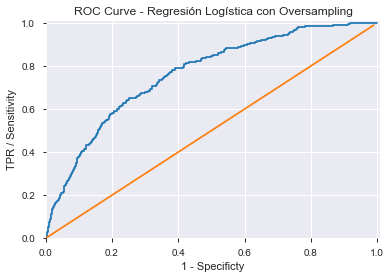

In [84]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Regresión Logística con Oversampling')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 7. Modelo de clasificación con Undersampling

#### a) Volvemos a crear las matrices de feature y vector de targets 

In [85]:
X = df.iloc[:,1:-1]

# eliminamos las columnas que no sirven
X.drop(columns = ['CustomerId','Surname'], inplace = True)
y = df['Exited']

In [86]:
X.columns
X=pd.get_dummies(X , prefix='', drop_first= True)

#### b) Realizamos el split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=16)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### c) Realizamos el undersampling

In [88]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.95

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [89]:
# Vemos la cantidad de observaciones en el set de entrenamiento resampleado para cada clase:

np.unique(y_train_res, return_counts=True)

(array([0, 1], dtype=int64), array([1715, 1630], dtype=int64))

#### 7.1 Naive Bayes 

In [90]:
model = GaussianNB()
model.fit(X_train_res,y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
# Normalizamos los datos del set de testeo y hacemos las predicciones:

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred)

0.494

In [93]:
roc_auc_score(y_test,y_pred)

0.6192509921323481

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56      1593
           1       0.26      0.83      0.40       407

    accuracy                           0.49      2000
   macro avg       0.58      0.62      0.48      2000
weighted avg       0.77      0.49      0.53      2000



In [95]:
print(confusion_matrix(y_test,y_pred))

[[650 943]
 [ 69 338]]


Text(0.5, 1.0, 'Matriz de confusión - Naive Bayes con Undersampling')

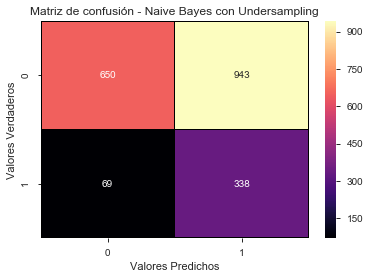

In [96]:
conf_nb2 = confusion_matrix(y_test,y_pred)
sns.heatmap(data=conf_nb2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Naive Bayes con Undersampling')

In [97]:
proba = model.predict_proba(X_test)

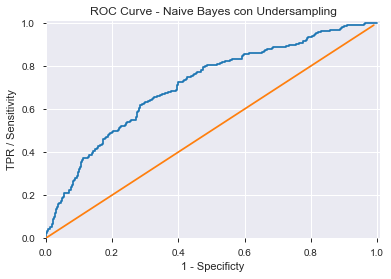

In [98]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Naive Bayes con Undersampling')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 7.2.KNN

In [99]:
k =range(1,60)
scores={}
scores_list=[]

In [100]:
for a in k:
    neigh = KNeighborsClassifier(n_neighbors=a)
    neigh.fit(X_train_res,y_train_res)
    y_pred=neigh.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Score')

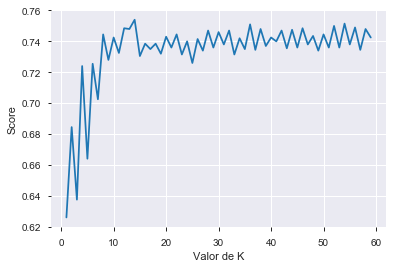

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k,scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Score")

In [102]:
results = pd.concat([pd.Series(k), pd.Series(scores_list)], axis = 1)
results.columns = ['k', 'scores_list']
best_k = results.loc[results['scores_list'] == results['scores_list'].max() , 'k']
print('El valor máximo de accuracy hallado es:',np.max(scores_list))
print('El número de vecinos óptimo para este modelo es:',[i for i in best_k][0])

El valor máximo de accuracy hallado es: 0.754
El número de vecinos óptimo para este modelo es: 14


In [103]:
neigh = KNeighborsClassifier(n_neighbors=14)
neigh.fit(X_train_res,y_train_res)
y_pred=neigh.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred)

0.6845

In [105]:
roc_auc_score(y_test,y_pred)

0.507435787096804

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1593
           1       0.22      0.21      0.21       407

    accuracy                           0.68      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.68      0.68      0.68      2000



In [107]:
print(confusion_matrix(y_test,y_pred))

[[1284  309]
 [ 322   85]]


Text(0.5, 1.0, 'Matriz de confusión - KNN con Undersampling')

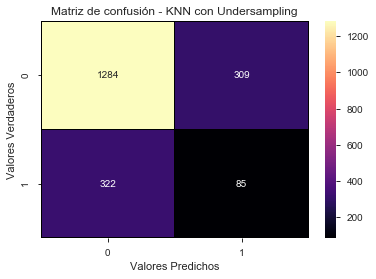

In [108]:
conf_knn2 = confusion_matrix(y_test,y_pred)
sns.heatmap(data=conf_knn2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - KNN con Undersampling')

In [109]:
proba = neigh.predict_proba(X_test)

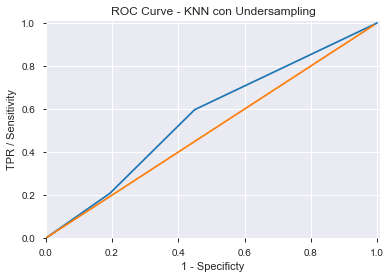

In [110]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - KNN con Undersampling')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 6.3 Regresion Logistica

In [111]:
rl = linear_model.LogisticRegression()
rl.fit(X_train_res,y_train_res)
predictions = rl.predict(X_test)

In [112]:
# name='Logistic Regression'
# kfold = model_selection.KFold(n_splits=10, random_state=123)
# cv_results = model_selection.cross_val_score(model, x_train_res,y_train_res, cv=kfold, scoring='accuracy')
# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(msg)

In [113]:
predictions = rl.predict(X_test)
print(accuracy_score(y_test, predictions))

0.777


In [114]:
roc_auc_score(y_test,predictions)

0.5234294386836761

In [115]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1593
           1       0.33      0.10      0.15       407

    accuracy                           0.78      2000
   macro avg       0.57      0.52      0.51      2000
weighted avg       0.71      0.78      0.72      2000



In [116]:
print(confusion_matrix(y_test,predictions))

[[1515   78]
 [ 368   39]]


Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística con Undrsampling')

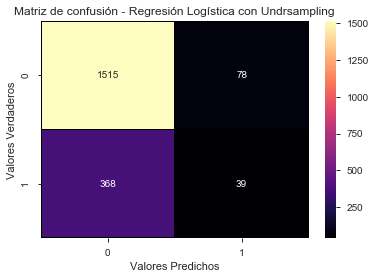

In [117]:
conf_log3 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log3, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Regresión Logística con Undrsampling')

In [118]:
proba = rl.predict_proba(X_test)

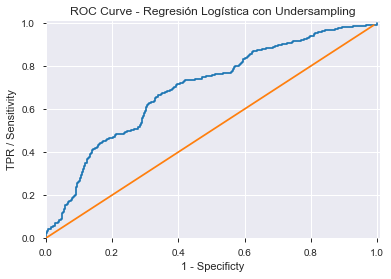

In [119]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Regresión Logística con Undersampling')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 8. Feature Selection

#### 8.1 Features con baja varianza 

In [120]:
df_reduced = df.copy()
df_reduced = df.drop(columns = ['CustomerId','Surname', 'RowNumber'])
df_reduced = pd.get_dummies(df_reduced, prefix='', drop_first= True)
df_reduced.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,_Germany,_Spain,_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [121]:
# Analizamos la varianza de las featrures no categóricas
df_reduced_num = df_reduced[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
df_reduced_num.apply(np.var)

CreditScore        9.340926e+03
Age                1.099831e+02
Balance            3.893047e+09
NumOfProducts      3.382880e-01
EstimatedSalary    3.307126e+09
dtype: float64

* Se observa que la variable `Number of products` tiene poca varianza

In [122]:
from sklearn.feature_selection import VarianceThreshold

# Instanciamos la clase VarianceThreshold definiendo un threshold=0.5

fet_sel = VarianceThreshold(threshold=0.5)

# Fiteamos a fet_sel con nuestro df1:

fet_sel.fit(df_reduced_num)

VarianceThreshold(threshold=0.5)

In [123]:
fet_sel.get_support()

array([ True,  True,  True, False,  True])

In [124]:
# Podemos filtrar las columnas que no superen el umbral de varianza:

df_reduced_num.columns[fet_sel.get_support()]

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], dtype='object')

#### 8.2 Eliminación Recursiva de Features con Cross Validation (RFECV)

In [125]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

In [126]:
kf = KFold(n_splits=5, shuffle = True)
estimator = linear_model.LinearRegression()
selector = RFECV(estimator, step = 1, cv=kf, scoring = 'neg_mean_squared_error', verbose=2)
X = df_reduced_num
y = df_reduced[['Exited']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=16)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
selector.fit(X_train, y_train)

Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=2)

In [127]:
df_reduced_num.loc[:,selector.support_].columns

Index(['CreditScore', 'Age', 'Balance'], dtype='object')

* Se observa que se quedó sólo con las variables no categóricas `Credit Score`, `Age` y `Balance`

#### 8.3 Select K Best 

In [130]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression


def select_kbest_reg(data_frame, target, k=2):
    """
    Seleccionado K-Best features para regresión
    :param data_frame: Un dataframe con datos
    :param target: target en el dataframe
    :param k: cantidad deseada de features
    :devuelve un dataframe llamado feature_scores con los scores para cada feature
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

kbest_feat = select_kbest_reg(df_reduced, "Exited", k=5)
kbest_feat = kbest_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
kbest_feat

,F Score,P Value,Support,Attribute
1,886.063275,1.239931e-186,True,Age
8,310.258384,2.059537e-68,True,_Germany
6,249.800794,1.348269e-55,True,IsActiveMember
3,142.473832,1.275563e-32,True,Balance
10,114.727989,1.258505e-26,True,_Male
9,27.809468,1.366655e-07,False,_Spain
4,22.915223,1.717333e-06,False,NumOfProducts
0,7.344522,6.738214e-03,False,CreditScore
2,1.960164,1.615268e-01,False,Tenure
7,1.463262,2.264404e-01,False,EstimatedSalary


#### 9. Modelo de clasificación con Feature Selection 

* Corremos nuevamente los modelos eliminando las variables con menor poder explicativo

#### 9. Modelo de clasificación simple (sin ajustes)

#### 9.1 Naive Bayes

* Comenzamos con **Naive Bayes** para obtener un modelo simple que sirva de *baseline* a nuestro trabajo

#### a) Generamos las variables de features y target

In [133]:
X = df.iloc[:,1:-1]

# eliminamos las columnas que no sirven
X.drop(columns = ['CustomerId','Surname', 'HasCrCard', 'EstimatedSalary', 'Tenure'], inplace = True)
y = df['Exited']

In [134]:
X.columns
X=pd.get_dummies(X , prefix='', drop_first= True)

#### b) Realizamos el split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=16)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### c) Ajuste y predicción

In [136]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [137]:
accuracy_score(y_test, y_pred)

0.81

In [138]:
roc_auc_score(y_test,y_pred)

0.6209738243636549

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1593
           1       0.56      0.30      0.39       407

    accuracy                           0.81      2000
   macro avg       0.70      0.62      0.64      2000
weighted avg       0.78      0.81      0.79      2000



In [140]:
print(confusion_matrix(y_test,y_pred))

[[1497   96]
 [ 284  123]]


Text(0.5, 1.0, 'Matriz de confusión - Naive Bayes sin ajustes')

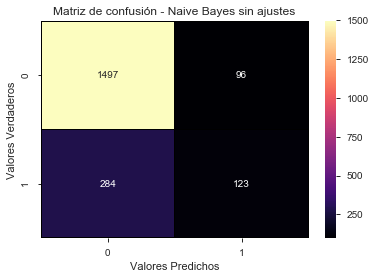

In [141]:
conf_nb1 = confusion_matrix(y_test,y_pred)
sns.heatmap(data=conf_nb1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Naive Bayes sin ajustes')

In [142]:
proba = model.predict_proba(X_test)

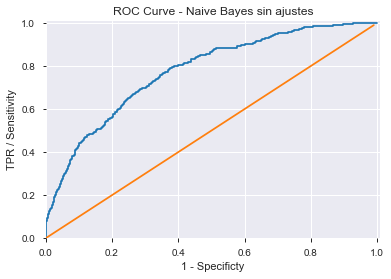

In [143]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Naive Bayes sin ajustes')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

#### 9.2.KNN

In [144]:
k =range(1,60)
scores={}
scores_list=[]

In [145]:
for a in k:
    neigh = KNeighborsClassifier(n_neighbors=a)
    neigh.fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Score')

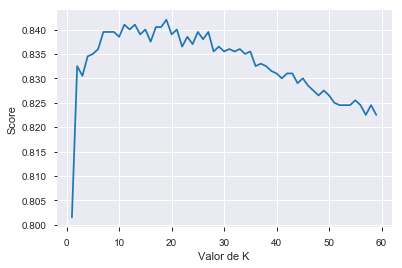

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k,scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Score")

In [147]:
results = pd.concat([pd.Series(k), pd.Series(scores_list)], axis = 1)
results.columns = ['k', 'scores_list']
best_k = results.loc[results['scores_list'] == results['scores_list'].max() , 'k']
print('El valor máximo de accuracy hallado es:',np.max(scores_list))
print('El número de vecinos óptimo para este modelo es:',[i for i in best_k][0])

El valor máximo de accuracy hallado es: 0.842
El número de vecinos óptimo para este modelo es: 19


In [148]:
neigh = KNeighborsClassifier(n_neighbors=19)
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)

In [149]:
accuracy_score(y_test, y_pred)

0.842

In [150]:
roc_auc_score(y_test,y_pred)

0.666671293789938

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.72      0.37      0.49       407

    accuracy                           0.84      2000
   macro avg       0.79      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000



In [152]:
print(confusion_matrix(y_test,y_pred))

[[1533   60]
 [ 256  151]]


Text(0.5, 1.0, 'Matriz de confusión - KNN sin ajustes')

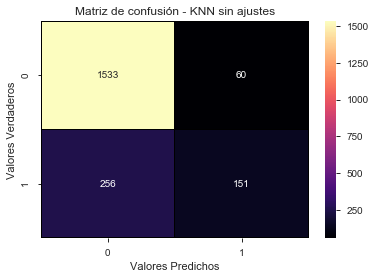

In [153]:
conf_knn1 = confusion_matrix(y_test,y_pred)
sns.heatmap(data=conf_knn1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - KNN sin ajustes')

In [154]:
proba = neigh.predict_proba(X_test)

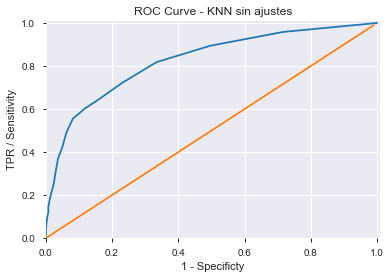

In [155]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - KNN sin ajustes')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 4.3 Regresion Logistica

In [156]:
rl = linear_model.LogisticRegression()
rl.fit(X_train,y_train)
predictions = rl.predict(X_test)

In [157]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=123)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.827250 (0.013391)


In [158]:
predictions = rl.predict(X_test)
print(accuracy_score(y_test, predictions))

0.803


In [159]:
roc_auc_score(y_test,predictions)

0.5799944782995631

In [160]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1593
           1       0.54      0.20      0.30       407

    accuracy                           0.80      2000
   macro avg       0.68      0.58      0.59      2000
weighted avg       0.77      0.80      0.77      2000



In [161]:
print(confusion_matrix(y_test,predictions))

[[1523   70]
 [ 324   83]]


Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística sin ajustes')

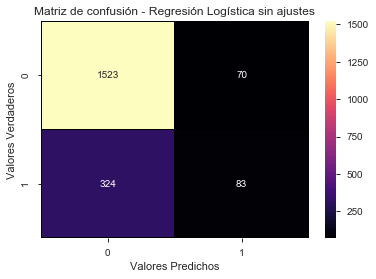

In [162]:
conf_log1 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Regresión Logística sin ajustes')

In [163]:
proba = rl.predict_proba(X_test)

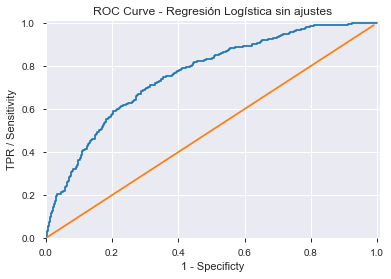

In [164]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Regresión Logística sin ajustes')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 5. Modelo de clasificación con class weights 

* Realizamos nuevamente la regresión logística balanceando las clases

In [165]:
rl = linear_model.LogisticRegression(C=1e10, class_weight = 'balanced')
rl.fit(X_train,y_train)
predictions = rl.predict(X_test)

In [170]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=123)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.827250 (0.013391)


In [171]:
predictions = rl.predict(X_test)
print(accuracy_score(y_test, predictions))

0.711


In [172]:
roc_auc_score(y_test,predictions)

0.6932772525992865

In [173]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1593
           1       0.38      0.66      0.48       407

    accuracy                           0.71      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.79      0.71      0.74      2000



In [174]:
print(confusion_matrix(y_test,predictions))

[[1152  441]
 [ 137  270]]


Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística con Class Weights')

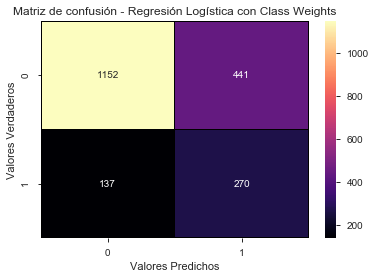

In [175]:
conf_log2 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Regresión Logística con Class Weights')

In [176]:
proba = rl.predict_proba(X_test)

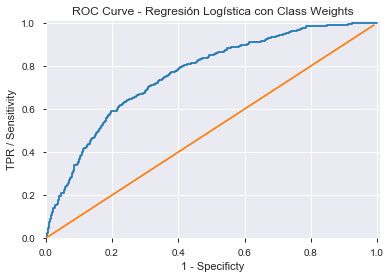

In [177]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, proba[:,1])
roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve - Regresión Logística con Class Weights')
plt.plot(roc['fpr'],roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

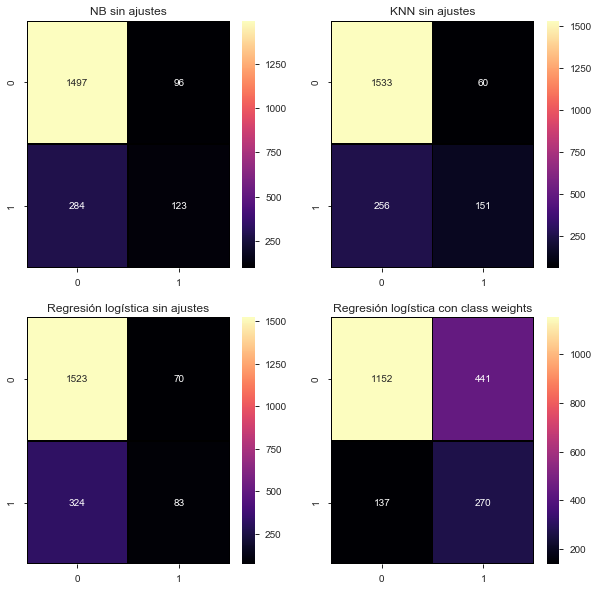

In [178]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax1.set_title('NB sin ajustes')

ax2 = fig.add_subplot(2, 2, 2) # row, column, position
ax2.set_title('KNN sin ajustes')

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Regresión logística sin ajustes')

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Regresión logística con class weights')

sns.heatmap(data=conf_nb1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma', ax = ax1)
sns.heatmap(data=conf_knn1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma', ax = ax2)
sns.heatmap(data=conf_log1, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma', ax = ax3)
sns.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma', ax = ax4)
plt.show()